# Rabbits and foxes

There are initially 400 rabbits and 200 foxes on a farm (but it could be two cell types in a 96 well plate or something, if you prefer bio-engineering analogies). Plot the concentration of foxes and rabbits as a function of time for a period of up to 600 days. The predator-prey relationships are given by the following set of coupled ordinary differential equations:

\begin{align}
\frac{dR}{dt} &= k_1 R - k_2 R F \tag{1}\\
\frac{dF}{dt} &= k_3 R F - k_4 F \tag{2}\\
\end{align}

* Constant for growth of rabbits $k_1 = 0.015$ day<sup>-1</sup>
* Constant for death of rabbits being eaten by foxes $k_2 = 0.00004$ day<sup>-1</sup> foxes<sup>-1</sup>
* Constant for growth of foxes after eating rabbits $k_3 = 0.0004$ day<sup>-1</sup> rabbits<sup>-1</sup>
* Constant for death of foxes $k_4 = 0.04$ day<sup>-1</sup>

Also plot the number of foxes versus the number of rabbits.

Then try also with 
* $k_3 = 0.00004$ day<sup>-1</sup> rabbits<sup>-1</sup>
* $t_{final} = 800$ days

*This problem is based on one from Chapter 1 of H. Scott Fogler's textbook "Essentials of Chemical Reaction Engineering".*


#### Solving ODEs

*Much of the following content reused under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2014 L.A. Barba, G.F. Forsyth. Partly based on David Ketcheson's pendulum lesson, also under CC-BY. https://github.com/numerical-mooc/numerical-mooc*

Let's step back for a moment. Suppose we have a first-order ODE $u'=f(u)$. You know that if we were to integrate this, there would be an arbitrary constant of integration. To find its value, we do need to know one point on the curve $(t, u)$. When the derivative in the ODE is with respect to time, we call that point the _initial value_ and write something like this:

$$u(t=0)=u_0$$

In the case of a second-order ODE, we already saw how to write it as a system of first-order ODEs, and we would need an initial value for each equation: two conditions are needed to determine our constants of integration. The same applies for higher-order ODEs: if it is of order $n$, we can write it as $n$ first-order equations, and we need $n$ known values. If we have that data, we call the problem an _initial value problem_.

Remember the definition of a derivative? The derivative represents the slope of the tangent at a point of the curve $u=u(t)$, and the definition of the derivative $u'$ for a function is:

$$u'(t) = \lim_{\Delta t\rightarrow 0} \frac{u(t+\Delta t)-u(t)}{\Delta t}$$

If the step $\Delta t$ is already very small, we can _approximate_ the derivative by dropping the limit. We can write:

$$\begin{equation}
u(t+\Delta t) \approx u(t) + u'(t) \Delta t
\end{equation}$$

With this equation, and because we know $u'(t)=f(u)$, if we have an initial value, we can step by $\Delta t$ and find the value of $u(t+\Delta t)$, then we can take this value, and find $u(t+2\Delta t)$, and so on: we say that we _step in time_, numerically finding the solution $u(t)$ for a range of values: $t_1, t_2, t_3 \cdots$, each separated by $\Delta t$. The numerical solution of the ODE is simply the table of values $t_i, u_i$ that results from this process.


# Euler's method
*Also known as "Simple Euler" or sometimes "Simple Error".*

The approximate solution at time $t_n$ is $u_n$, and the numerical solution of the differential equation consists of computing a sequence of approximate solutions by the following formula, based on Equation (10):

$$u_{n+1} = u_n + \Delta t \,f(u_n).$$

This formula is called **Euler's method**.

For the equations of the rabbits and foxes, Euler's method gives the following algorithm that we need to implement in code:

\begin{align}
R_{n+1} & = R_n + \Delta t \left(k_1 R_n - k_2 R_n F_n \right) \\
F_{n+1} & = F_n + \Delta t \left( k_3 R_n F_n - k_4 F_n \right).
\end{align}


In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt


k1 = 0.015
k2 = 0.00004
k3 = 0.0004
k4 = 0.04
end_time = 600.
step_size = 1.
times = np.arange(0, end_time, step_size)
rabbits = np.zeros_like(times)
foxes = np.zeros_like(times)
rabbits[0] = 400.
foxes[0] = 200.
for n in range(len(times)-1):
    delta_t = times[n+1] - times[n]
    rabbits[n+1] = rabbits[n] + delta_t * (k1 * rabbits[n] - k2 * rabbits[n] * foxes[n])
    foxes[n+1] = foxes[n] + delta_t * (k3 * rabbits[n] * foxes[n] - k4 * foxes[n])


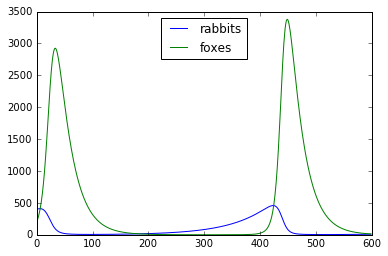

In [2]:
plt.plot(times, rabbits, label='rabbits')
plt.plot(times, foxes, label='foxes')
plt.legend(loc="best")
plt.show()

In [3]:
k1 = 0.015
k2 = 0.00004
k3 = 0.0004
k4 = 0.04
def solve_by_euler(step_size = 1.):
    """
    Evaluate by simple Euler, with the given step size.
    
    Returns the peak number of foxes.
    """
    end_time = 600.
    times = np.arange(0, end_time, step_size)
    rabbits = np.zeros_like(times)
    foxes = np.zeros_like(times)
    rabbits[0] = 400
    foxes[0] = 200
    for n in range(len(times)-1):
        delta_t = times[n+1] - times[n]
        rabbits[n+1] = rabbits[n] + delta_t * (k1 * rabbits[n] - k2 * rabbits[n] * foxes[n])
        foxes[n+1] = foxes[n] + delta_t * (k3 * rabbits[n] * foxes[n] - k4 * foxes[n])
    return foxes.max()

step_sizes = []
maximums = []
for i in range(20):
    print(i)
    step_size = 10**(1-i/5)
    print("step size",step_size)
    maximum = solve_by_euler(step_size)
    print("max foxes",maximum)
    step_sizes.append(step_size)
    maximums.append(maximum)

0
step size 10.0
max foxes 9998.78475782
1
step size 6.309573444801933
max foxes 3757.41265232
2
step size 3.9810717055349722
max foxes 6831.75851318
3
step size 2.51188643150958
max foxes 4686.90809525
4
step size 1.5848931924611134
max foxes 3801.65788402
5
step size 1.0
max foxes 3379.27631701
6
step size 0.6309573444801934
max foxes 3146.04098438
7
step size 0.3981071705534973
max foxes 3012.6379837
8
step size 0.25118864315095796
max foxes 2932.87919521
9
step size 0.15848931924611134
max foxes 2884.18652591
10
step size 0.1
max foxes 2854.12476091
11
step size 0.0630957344480193
max foxes 2835.41436334
12
step size 0.039810717055349734
max foxes 2823.7085615
13
step size 0.025118864315095794
max foxes 2816.36116277
14
step size 0.01584893192461114
max foxes 2811.74114081
15
step size 0.01
max foxes 2808.83241288
16
step size 0.00630957344480193
max foxes 2806.99952212
17
step size 0.003981071705534973
max foxes 2805.84398119
18
step size 0.0025118864315095794
max foxes 2805.11527

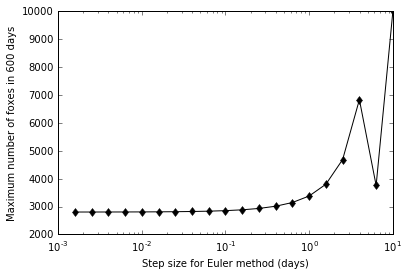

In [4]:

plt.semilogx(step_sizes, maximums, 'kd-')
plt.ylabel("Maximum number of foxes in 600 days")
plt.xlabel("Step size for Euler method (days)")
plt.show()

In [5]:
maximums = np.array(maximums)
errors = maximums - maximums[-1] # calculate error relative to the last value

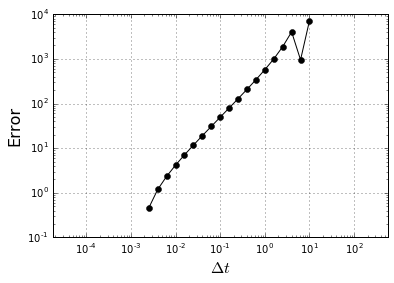

In [6]:
# plot all but the last point, because log(0.0) will cause problems scaling the axes
plt.loglog(step_sizes[:-1], errors[:-1], 'ko-')

plt.axis('equal') # scale the axes to make a square a square
plt.grid(True) # turn on the grid lines
plt.xlabel("$\Delta t$", fontsize=16)
plt.ylabel("Error", fontsize=16)
plt.show()

### odeint Method

In [7]:
from scipy.integrate import odeint

time = np.arange(0., 600., 1.)
def diffeq(RF, t, k1, k2, k3, k4):
    R, F = RF
    dRFdt = [k1 * R - k2 * R * F, k3 * R * F - k4 * F]
    return dRFdt

In [8]:
solution = odeint(diffeq, [400.,200.], time, args=(k1, k2, k3, k4))

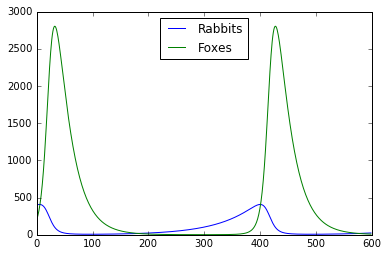

In [9]:
plt.plot(time, solution[:,0], label='Rabbits')
plt.plot(time, solution[:,1], label='Foxes')
plt.legend(loc="best")
plt.show()

In [10]:
from scipy.signal import argrelextrema
peaks = argrelextrema(solution, np.greater, order=20)
print(peaks[0])

x = round(solution[peaks[0][1],1],0)
y = round(solution[peaks[0][3],1],0)
time1 = round(times[peaks[0][1]],2)
time2 = round(times[peaks[0][3]],2)


print("The foxes first peak at ", x, " at ", time1, "days")
print("The foxes peak the 2nd time peak at ", y, " at ", time2, "days")



[  5  32 401 428]
The foxes first peak at  2803.0  at  32.0 days
The foxes peak the 2nd time peak at  2804.0  at  428.0 days


### KMC Method

In [11]:
import random
import math

#Create function for Kinetic Monte Carlo
def MCfunc (time_frame): 
    #define rate constants, initial populations
    k1 = 0.015
    k2 = 0.00004
    k3 = 0.0004
    k4 = 0.04
    rabbits = [400]
    foxes = [200]
    #create place to store populations and times, set initial time
    rabbit_foxes=[400, 200]
    time = [0]
    days = 0
    
    while time_frame>days:
        
        #calculate rates for all four events
        r1 = k1*rabbit_foxes[0]
        r2 = k2*rabbit_foxes[0]*rabbit_foxes[1]
        r3 = k3*rabbit_foxes[0]*rabbit_foxes[1]
        r4 = k4*rabbit_foxes[1]
        
        #sum rates and choose a random number. multiply sum of the rates and random number
        Q = r1+r2+r3+r4
        random_number=random.uniform(0,1)
        check = Q*random_number
        
        #check to see which event occurs
        if check <= r1:
            rabbit_foxes[0]=rabbit_foxes[0]+1
            rabbit_foxes[1]=rabbit_foxes[1]
        elif r1 < check <= r1+r2:
            rabbit_foxes[0]=rabbit_foxes[0]-1
            rabbit_foxes[1]=rabbit_foxes[1]
        elif r1+r2 < check <= r1+r2+r3:
            rabbit_foxes[0]=rabbit_foxes[0]
            rabbit_foxes[1]=rabbit_foxes[1]+1
        else:
            rabbit_foxes[0]=rabbit_foxes[0]
            rabbit_foxes[1]=rabbit_foxes[1]-1
        
        #add the new population to the storage list
        rabbits.append(rabbit_foxes[0])
        foxes.append(rabbit_foxes[1])
        
        #generate a new random number
        random_number=random.uniform(0,1)
        #calculate the time step
        delta_t = math.log(1/random.uniform(0,1))/Q
        days = days + delta_t
        #add the time step to the storage list for time
        time.append(days)
        
        #break if all foxes die out
        if rabbit_foxes[1]==0:
            break
           
            
        
    return(rabbits, foxes, time, Foxes_Die)



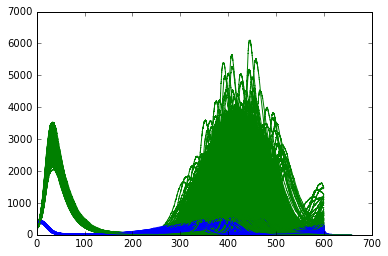

In [12]:
#create counter for number of times foxes die out
Foxes_Die=0
#create list to store values at peaks for foxes and times
Foxes_Avg_Peak=[0]
Time_Avg_Peak=[0]
#define number of iterations
Trials = 10000
for i in range(Trials):
    #run the KMC
    Solution = MCfunc(600)
    #plot all values on the same graph
    plt.plot(Solution[2],Solution[0],'b')
    plt.plot(Solution[2],Solution[1],'g')

    time=(Solution[2])
    fox=(Solution[1])
    b=12000
    #set first 12000 values of foxes list to 0
    fox[:b] = [0] * b
    #find 2nd peak of foxes
    c=max(fox)

    #if 2nd peak exists, add number of foxes and time it occurs to storage list. only return first peak if peak repeats itself
    if c>1200:
        for position, item in enumerate(fox):
            if item == c:
                Foxes_Avg_Peak.append(c)
                Time_Avg_Peak.append(Solution[2][position])
                break
    #if 2nd peak doesn't exist, add to the counter for number of times foxes die
    else:
        Foxes_Die=Foxes_Die+1

In [13]:
print("The 2nd peak appears on average at ", round(sum(Foxes_Avg_Peak)/float((len(Foxes_Avg_Peak)-1))), "foxes, which occurs at ", round(sum(Time_Avg_Peak)/float((len(Time_Avg_Peak)-1))), "days.")
print("The probability that no 2nd peak forms (and all the foxes die out before 600 days) is ",100*Foxes_Die/Trials,"%")

The 2nd peak appears on average at  2324 foxes, which occurs at  378 days.
The probability that no 2nd peak forms (and all the foxes die out before 600 days) is  65.83 %


In [21]:
#took np.percentile idea from  jtr5395
time_75, time_25 = np.percentile(Time_Avg_Peak, [75 ,25])
fox_75, fox_25 = np.percentile(Foxes_Avg_Peak, [75 ,25])
print("The IQR of foxes is", round(fox_25), "to", round(fox_75))
print("The IQR of times is", round(time_25), "to", round(time_75))

The IQR of foxes is 1892.0 to 2679.0
The IQR of times is 375.0 to 418.0


Things I learned:

This definitely helped me learn a lot about python. There are definitely examples of "poor coding" in my work. For example, when finding the 2nd peak my code assumes that the first 12000 values of the foxes array are 0 to eliminate the first peak. However, if the value of the foxes is still above 1200 after 12000 values then the program will return a false peak. I learned how to use "append" to add values onto lists which is very useful for recording values during iterations. Even outside of coding I had no idea what a Kinetic Monte Carlo Analysis was previously. The biggest issue for me was learning KMC, and I had to look at some of my classmates code to help me understand (specifically awolek and jtr5395). Practicing with odeint was a nice reminder from kinetics on how to utilize a differential equation solver.
